In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
delta = float(1)
breit_wigner = pd.read_csv('/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Excercise 12 - LMA/breit_wigner.csv')
delta

1.0

In [4]:
len(breit_wigner['y'])

9

In [5]:
def breit_wigner(x: np.ndarray,
                 a: float, b: float, c: float) -> np.ndarray:
    return a / ((b - x)**2 + c)

In [6]:
def gauss_newton_update(jacobian: np.ndarray, error: np.ndarray) -> np.ndarray:
    # compute the parameter update delta_beta
    
    A = (jacobian.T @ jacobian) 
    g = (jacobian @ error)
    delta_beta = np.linalg.solve(A,g)
    
    #Might need this: np.zeros(jacobian.shape[1])
    
    return delta_beta

#Prototyped by examiner
def gauss_newton(x: np.ndarray,
                 y: np.ndarray,
                 beta: np.ndarray,
                 function: callable,
                 max_iter: int = 100,
                 threshold: float = 1e-3) -> tuple[np.ndarray, int]:
    
    for i in range(1, max_iter + 1):
        jac = eval_jacobian(x, beta, function)
        err = eval_error(x, y, beta, function)
        delta_beta = gauss_newton_update(jac, err)
        beta += delta_beta
        
        if np.linalg.norm(delta_beta) < threshold:
            break
    if i == max_iter:
        raise UserWarning(f"Gauss-Newton method did not converge in {i} iterations.")
    return beta, i


### Excercise 1 

In [7]:
def eval_jacobian(x: np.ndarray, beta: np.ndarray,
                  function: callable, delta: float = 1e-4) -> np.ndarray:
    # initialize jacobian matrix with zeros
    jacobian = np.zeros((len(x), len(beta)))
    # compute entries in jacobian matrix
    for i in range(len(x)): 
        for j in range(len(beta)):
            plus_delta_beta = beta.copy()
            minus_delta_beta = beta.copy()
            
            plus_delta_beta[j] += delta
            minus_delta_beta[j] -= delta
            
            jacobian[i,j] = (function(x[i], *plus_delta_beta) - function(x[i], *minus_delta_beta)) / (2*delta) ##* <- makes to 
        
    return jacobian

### Exercise 2 - Calculate Error

In [8]:
def eval_error(x: np.ndarray, y: np.ndarray,
               beta: np.ndarray, function: callable) -> np.ndarray:
    # compute the error of f(x) with parameters beta
    
    error = y - function(x,*beta)
    return error

In [9]:
## Test 

# Breit-Wigner 함수 정의
def breit_wigner(x: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    return a / ((b - x)**2 + c)

# 테스트 데이터 수정 (Breit-Wigner 함수를 사용하기 위한 적절한 예제)
x = np.linspace(0, 10, 5)  # Example input data
y = breit_wigner(x, 1, 5, 1)  # Observed output data with known parameters
beta = np.array([1, 5, 1], dtype=float)  # Parameters that should match the function's expected inputs

# 오류 계산
error = eval_error(x, y, beta, breit_wigner)
print("Error:", error)

# 오류는 [0, 0, 0, 0, 0] 과 같아야 함, 즉 모델이 정확할 때 y와 함수 값의 차이가 0이어야 함


Error: [0. 0. 0. 0. 0.]


### Exercise 3 - Gauss Newton Update to find Delta

In [11]:
def gauss_newton_update(jacobian: np.ndarray, error: np.ndarray) -> np.ndarray:
    # compute the parameter update delta_beta
    # ...
    
    delta_beta = np.zeros(jacobian.shape[1])
    
    A = jacobian.T @ jacobian
    g = jacobian.T @ error
    delta_beta = np.linalg.solve(A,g)
    
    return delta_beta


def gauss_newton(x: np.ndarray,
                 y: np.ndarray,
                 beta: np.ndarray,
                 function: callable,
                 max_iter: int = 100,
                 threshold: float = 1e-3) -> tuple[np.ndarray, int]:
    
    for i in range(1, max_iter + 1):
        jac = eval_jacobian(x, beta, function)
        err = eval_error(x, y, beta, function)
        delta_beta = gauss_newton_update(jac, err)
        beta += delta_beta
        if np.linalg.norm(delta_beta) < threshold:
            break
    if i == max_iter:
        raise UserWarning(f"Gauss-Newton method did not converge in {i} iterations.")
    return beta, i

In [12]:
##Test 

x = np.linspace(0, 10, 50)  # x 데이터
true_beta = np.array([1.0, 5.0, 1.0])  # 실제 파라미터 값
y = breit_wigner(x, *true_beta)  # y 데이터, 실제 파라미터로 생성

# 초기 추정치 설정 (true_beta와 다르게 설정)
initial_beta = np.array([0.5, 4.0, 0.5])

# Gauss-Newton 메서드 적용
optimized_beta, num_iterations = gauss_newton(x, y, initial_beta, breit_wigner)

# 실제 vs 예상 결과 출력
print("True Beta:", true_beta)
print("Initial Beta:", initial_beta)
print("Optimized Beta:", optimized_beta)
print("Number of Iterations:", num_iterations)

# 예상 결과와 실제 결과 비교
np.testing.assert_allclose(optimized_beta, true_beta, rtol=1e-4, atol=1e-4)
print("The optimized beta values are close to the true beta values.")

True Beta: [1. 5. 1.]
Initial Beta: [1. 5. 1.]
Optimized Beta: [1. 5. 1.]
Number of Iterations: 7
The optimized beta values are close to the true beta values.


### Excercise 4 LM model

In [141]:
def levenberg_marquardt(x: np.ndarray,
                        y: np.ndarray,
                        beta: np.ndarray,
                        function: callable,
                        max_iter: int = 1000,
                        threshold: float = 1e-3) -> tuple[np.ndarray, int]:
    
    # compute initial parameter lambda
    lambda_i = 1
  
    for i in range(1, max_iter + 1):
        # compute jacobian, error, and delta_beta
        
        jacobian = eval_jacobian(x,beta,function)
        
        error = eval_error(x,y,beta,function)
        delta_beta = lm_update(jacobian, error, lambda_i) 
        
        new_beta = beta + delta_beta
        
        new_error = eval_error(x, y, new_beta, function)
    
        # compute quality measure rho
        rho = (np.linalg.norm(error)**2 - np.linalg.norm(new_error)**2) / (delta_beta.T @ (lambda_i * delta_beta + jacobian.T @ error)) #lambda_i is not a vector
        
        # update lambda according to quality measur                                                                 
        if rho > 0:
            beta = new_beta 
            lambda_i = max(lambda_i / 9, 10**-7)
            
        # update beta if quality measure is positive
        
        else:
            lambda_i = min(lambda_i * 11, 10**7)
            
        # check for early convergence
        if np.linalg.norm(delta_beta) < threshold: 
            print(f'Convergence at the iteration i: {i}') # Found the optimal delta_beta before final rounds
            return beta, i 

    if i == max_iter:
        raise UserWarning(f"Levenberg-Marquardt method did not converge in {i} iterations.")
    return beta, i

In [136]:
## Calculate LM delta_beta
def lm_update(jacobian: np.ndarray,
              error: np.ndarray,
              lm_lambda: float) -> np.ndarray:
    # compute the parameter update delta_beta
    n = jacobian.shape[1]
    I = np.eye(n)
    delta_beta = np.zeros(jacobian.shape[1])
    A = ((jacobian.T @ jacobian) + (lm_lambda * I)) #Vectoris lm_lambda
    g = jacobian.T @ error  
    
    delta_beta = np.linalg.solve(A,g)
    
    return delta_beta

### Final Run 

Testing Gauss-Newton method:
Initial guess: [100000, 100, 1000]
Converged in 9 iterations.
-> Converged in 9 iterations
-> Final parameters: [66886.39000034    77.49357897   788.88385913]
Initial guess: [80000, 100, 700]
Converged in 8 iterations.
-> Converged in 8 iterations
-> Final parameters: [66886.3899178     77.49357897   788.88385795]
Initial guess: [50000, 100, 700]
Converged in 10 iterations.
-> Converged in 10 iterations
-> Final parameters: [66886.38975458    77.49357897   788.88385575]
Initial guess: [80000, 150, 1000]
-> Did not converge: Singular matrix
Initial guess: [80000, 70, 700]
Converged in 8 iterations.
-> Converged in 8 iterations
-> Final parameters: [66886.39010117    77.49357897   788.88386048]
Initial guess: [10000, 50, 500]
-> Did not converge: Singular matrix
Initial guess: [1000, 10, 100]
-> Did not converge: Singular matrix
Initial guess: [1, 1, 1]
-> Did not converge: Singular matrix

Testing Levenberg-Marquardt method:
Initial guess: [100000, 100, 1000

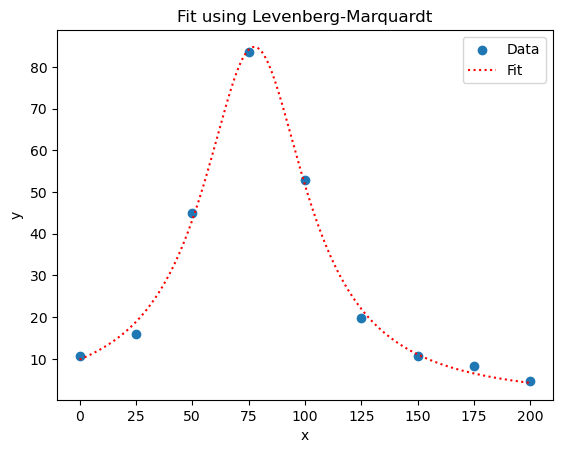

In [142]:
if __name__ == "__main__":
    # Load the data
    data = pd.read_csv("breit_wigner.csv")
    
    # Extract x and y columns from the NumPy array
    #x = data[:, 0]  # Assuming 'x' is the first column
    #y = data[:, 1]  # Assuming 'y' is the second column

    beta_guess_list = [
        [100000, 100, 1000],
        [80000, 100, 700],
        [50000, 100, 700],
        [80000, 150, 1000],
        [80000, 70, 700],
        [10000, 50, 500],
        [1000, 10, 100],
        [1, 1, 1]
    ]

    print("Testing Gauss-Newton method:")
    
    for beta_guess in beta_guess_list:
        print("Initial guess:", beta_guess)
        try:
            beta, iterations = gauss_newton(x, y, beta_guess, breit_wigner, max_iter=500)
            print(f"-> Converged in {iterations} iterations")
            print("-> Final parameters:", beta)
        except Exception as e:
            print("-> Did not converge:", e)

    print("")
    print("Testing Levenberg-Marquardt method:")
    
    for beta_guess in beta_guess_list:
        print("Initial guess:", beta_guess)
        try:
            beta, iterations = levenberg_marquardt(x, y, beta_guess, breit_wigner)
            print(f"-> Converged in {iterations} iterations")
            print("-> Final parameters:", beta)
        except UserWarning as e:
            print("-> Did not converge:", e)

    # Plotting the results of the final Levenberg-Marquardt fit
    
    x_range = np.linspace(min(x), max(x), 1000)
    y_range = breit_wigner(pd.DataFrame({'x': x_range}), beta)

    plt.figure()
    plt.scatter(x, y, label="Data")
    plt.plot(x_range, y_range, ":r", label="Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Fit using Levenberg-Marquardt")
    plt.show()
    
    

In [138]:
data = pd.read_csv('/Users/parkinhyuk/Desktop/TUM/Python for Engineering Data Analysis - From Machine Learning to Visualization/Excercise 12 - LMA/breit_wigner.csv')
data.to_numpy()

array([[  0.  ,  10.6 ],
       [ 25.  ,  16.  ],
       [ 50.  ,  45.  ],
       [ 75.  ,  83.5 ],
       [100.  ,  52.8 ],
       [125.  ,  19.9 ],
       [150.  ,  10.8 ],
       [175.  ,   8.25],
       [200.  ,   4.7 ]])

Testing Gauss-Newton method:
Initial guess: [100000, 100, 1000]
Converged in 9 iterations.
-> Converged in   9 iterations
-> Final parameters: [66886.39000034    77.49357897   788.88385913]
Initial guess: [80000, 100, 700]
Converged in 8 iterations.
-> Converged in   8 iterations
-> Final parameters: [66886.3899178     77.49357897   788.88385795]
Initial guess: [50000, 100, 700]
Converged in 10 iterations.
-> Converged in  10 iterations
-> Final parameters: [66886.38975458    77.49357897   788.88385575]
Initial guess: [80000, 150, 1000]
-> Did not converge: Singular matrix
Initial guess: [80000, 70, 700]
Converged in 8 iterations.
-> Converged in   8 iterations
-> Final parameters: [66886.39010117    77.49357897   788.88386048]
Initial guess: [10000, 50, 500]
-> Did not converge: Singular matrix
Initial guess: [1000, 10, 100]
-> Did not converge: Singular matrix
Initial guess: [1, 1, 1]
-> Did not converge: Singular matrix

Testing Levenberg-Marquardt method:
Initial guess: [100000, 10

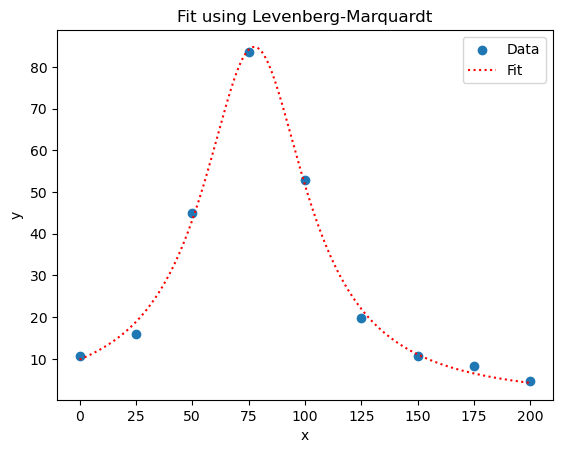

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def breit_wigner(x: np.ndarray, beta: np.ndarray) -> np.ndarray:
    a, b, c = beta
    return a / ((b - x)**2 + c)

def eval_jacobian(x: np.ndarray, beta: np.ndarray, function: callable, delta: float = 1e-4) -> np.ndarray:
    n = len(beta)  # Number of parameters
    m = len(x)     # Number of data points
    
    J = np.zeros((m, n))  # Initialize Jacobian matrix
    
    for j in range(n):
        beta_plus = beta.copy()
        beta_minus = beta.copy()
        
        beta_plus[j] += delta
        beta_minus[j] -= delta
        
        J[:, j] = (function(x, beta_plus) - function(x, beta_minus)) / (2 * delta)
    
    return J

def eval_error(x: np.ndarray, y: np.ndarray, beta: np.ndarray, function: callable) -> np.ndarray:
    predictions = function(x, beta)
    return y - predictions

def gauss_newton_update(jacobian: np.ndarray, error: np.ndarray) -> np.ndarray:
    A = jacobian.T @ jacobian
    g = jacobian.T @ error
    delta_beta = np.linalg.solve(A, g)
    return delta_beta

def gauss_newton(x: np.ndarray,
                 y: np.ndarray,
                 beta: np.ndarray,
                 function: callable,
                 max_iter: int = 100,
                 threshold: float = 1e-3) -> tuple[np.ndarray, int]:
    beta = np.array(beta, dtype=float)  # Ensure beta is a float array
    
    for i in range(1, max_iter + 1):
        jac = eval_jacobian(x, beta, function)
        err = eval_error(x, y, beta, function)
        delta_beta = gauss_newton_update(jac, err)
        beta += delta_beta
        
        if np.linalg.norm(delta_beta) < threshold:
            print(f"Converged in {i} iterations.")
            break
    
    if i == max_iter:
        raise UserWarning(f"Gauss-Newton method did not converge in {i} iterations.")
    
    return beta, i

def lm_update(jacobian: np.ndarray,
              error: np.ndarray,
              lm_lambda: float) -> np.ndarray:
    n = jacobian.shape[1]
    I = np.eye(n)
    A = jacobian.T @ jacobian + lm_lambda * I
    g = jacobian.T @ error
    delta_beta = np.linalg.solve(A, g)
    return delta_beta

def levenberg_marquardt(x: np.ndarray,
                        y: np.ndarray,
                        beta: np.ndarray,
                        function: callable,
                        max_iter: int = 1000,
                        threshold: float = 1e-3) -> tuple[np.ndarray, int]:
    lambda_ = 1e-3
    beta = np.array(beta, dtype=float)  # Ensure beta is a float array
    
    for i in range(1, max_iter + 1):
        jacobian = eval_jacobian(x, beta, function)
        error = eval_error(x, y, beta, function)
        
        delta_beta = lm_update(jacobian, error, lambda_)
        beta_new = beta + delta_beta
        
        new_error = eval_error(x, y, beta_new, function)
        
        rho = (np.linalg.norm(error)**2 - np.linalg.norm(new_error)**2) / (delta_beta.T @ (lambda_ * delta_beta + jacobian.T @ error))
        
        if rho > 0:
            beta = beta_new
            lambda_ *= max(1/3, 1 - (2 * rho - 1)**3)
        else:
            lambda_ *= 2
        
        if np.linalg.norm(delta_beta) < threshold:
            print(f"Converged in {i} iterations.")
            return beta, i
    
    if i == max_iter:
        raise UserWarning(f"Levenberg-Marquardt method did not converge in {i} iterations.")
    
    return beta, i

if __name__ == "__main__":
    # Load the data from the CSV file
    data = pd.read_csv("breit_wigner.csv")
    
    # Ensure that 'x' and 'y' columns are extracted correctly
    x = data["x"].values
    y = data["y"].values
    
    beta_guess_list = [
        [100000, 100, 1000],
        [80000, 100, 700],
        [50000, 100, 700],
        [80000, 150, 1000],
        [80000, 70, 700],
        [10000, 50, 500],
        [1000, 10, 100],
        [1, 1, 1]
    ]

    print("Testing Gauss-Newton method:")
    for beta_guess in beta_guess_list:
        print("Initial guess:", beta_guess)
        try:
            beta, iterations = gauss_newton(x, y, beta_guess, breit_wigner, max_iter=500)
            print(f"-> Converged in {iterations:3d} iterations")
            print("-> Final parameters:", beta)
        except Exception as e:
            print("-> Did not converge:", e)

    print("")
    print("Testing Levenberg-Marquardt method:")
    for beta_guess in beta_guess_list:
        print("Initial guess:", beta_guess)
        try:
            beta, iterations = levenberg_marquardt(x, y, beta_guess, breit_wigner)
            print(f"-> Converged in {iterations:3d} iterations")
            print("-> Final parameters:", beta)
        except UserWarning as e:
            print("-> Did not converge:", e)

    # Plotting the results of the final Levenberg-Marquardt fit
    x_range = np.linspace(min(x), max(x), 1000)
    y_range = breit_wigner(x_range, beta)

    plt.figure()
    plt.scatter(x, y, label="Data")
    plt.plot(x_range, y_range, ":r", label="Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Fit using Levenberg-Marquardt")
    plt.show()
